# Cars24 Price Prediction

**Exploratory Data Analysis**

In [ ]:
# importing required libraries
# Data handling
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Mosaic plots
from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# importing and displaying the dataset
df=pd.read_csv(r"/content/cars24_20221210.csv")

Overview of Dataset

In [ ]:
# displaying the shape
df.shape


(6437, 19)

In [ ]:
df.head()


,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28


In [ ]:
# displaying the columns
df.columns

Index(['name', 'make', 'model', 'city', 'year', 'fueltype', 'kilometerdriven',
       'ownernumber', 'transmission', 'bodytype', 'storename', 'isc24assured',
       'registrationcity', 'registrationstate', 'benefits', 'discountprice',
       'price', 'url', 'createdDate'],
      dtype='object')

In [ ]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

print("Numerical Columns:")
print(num_cols)

print("\nCategorical Columns:")
print(cat_cols)

Numerical Columns:
['year', 'kilometerdriven', 'ownernumber', 'benefits', 'discountprice', 'price']

Categorical Columns:
['name', 'make', 'model', 'city', 'fueltype', 'transmission', 'bodytype', 'storename', 'isc24assured', 'registrationcity', 'registrationstate', 'url', 'createdDate']


In [ ]:
# Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6437 entries, 0 to 6436
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               6437 non-null   object
 1   make               6437 non-null   object
 2   model              6437 non-null   object
 3   city               6437 non-null   object
 4   year               6437 non-null   int64 
 5   fueltype           6437 non-null   object
 6   kilometerdriven    6437 non-null   int64 
 7   ownernumber        6437 non-null   int64 
 8   transmission       6061 non-null   object
 9   bodytype           6062 non-null   object
 10  storename          6437 non-null   object
 11  isc24assured       6437 non-null   bool  
 12  registrationcity   6437 non-null   object
 13  registrationstate  6437 non-null   object
 14  benefits           6437 non-null   int64 
 15  discountprice      6437 non-null   int64 
 16  price              6437 non-null   int64 


In [ ]:
df.describe(include='all')

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
count,6437,6437,6437,6437,6437.000000,6437,6437.000000,6437.000000,6061,6062,6437,6437,6437,6437,6437.000000,6437.000000,6.437000e+03,6437,6437
unique,135,20,134,41,NaN,3,NaN,NaN,2,6,203,2,358,16,NaN,NaN,NaN,6422,310
top,Hyundai Grand i10,Maruti,Grand I10,Bangalore,NaN,Petrol,NaN,NaN,Manual,Hatchback,Bengaluru-Pns,False,Hyderabad,Maharashtra,NaN,NaN,NaN,https://www.cars24.com/buy-used-mahindra-boler...,2022-12-09
freq,370,2594,370,988,NaN,5072,NaN,NaN,5005,3588,324,6386,562,1256,NaN,NaN,NaN,2,153
mean,NaN,NaN,NaN,NaN,2017.636166,NaN,41568.066335,1.235669,NaN,NaN,NaN,NaN,NaN,NaN,12079.200559,23500.592512,6.781378e+05,NaN,NaN
std,NaN,NaN,NaN,NaN,2.656825,NaN,26187.115364,0.454501,NaN,NaN,NaN,NaN,NaN,NaN,2458.162316,41579.296564,3.450395e+05,NaN,NaN
min,NaN,NaN,NaN,NaN,2008.000000,NaN,64.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,9688.000000,-155500.000000,1.340000e+05,NaN,NaN
25%,NaN,NaN,NaN,NaN,2016.000000,NaN,20580.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,9688.000000,-100.000000,4.390000e+05,NaN,NaN
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,38177.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,12542.000000,10600.000000,5.880000e+05,NaN,NaN
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,59333.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,13898.000000,37000.000000,8.290000e+05,NaN,NaN


In [ ]:
# Checking missing values
df.isnull().sum()

,0
name,0
make,0
model,0
city,0
year,0
fueltype,0
kilometerdriven,0
ownernumber,0
transmission,376
bodytype,375


In [ ]:
#  Filling with mode (if categorical)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['bodytype'].fillna(df['bodytype'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()


,0
name,0
make,0
model,0
city,0
year,0
fueltype,0
kilometerdriven,0
ownernumber,0
transmission,0
bodytype,0


Data Types & Type correction

In [ ]:
df['createdDate'] = pd.to_datetime(df['createdDate'], errors='coerce')
df['isc24assured'] = df['isc24assured'].astype(bool)

#  convert object columns to category
cat_cols = ['name', 'make', 'model', 'city', 'fueltype', 'transmission',
            'bodytype', 'storename', 'registrationcity', 'registrationstate']
df[cat_cols] = df[cat_cols].astype('category')



Unique Values in Categorical Columns

In [ ]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


name: 135 unique values
make: 20 unique values
model: 134 unique values
city: 41 unique values
fueltype: 3 unique values
transmission: 2 unique values
bodytype: 6 unique values
storename: 203 unique values
registrationcity: 358 unique values
registrationstate: 16 unique values


Outlier Detection(Numerical Columns)

In [ ]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

outliers_km = detect_outliers('kilometerdriven')
print(f"Number of outliers in 'kilometerdriven': {len(outliers_km)}")
print(outliers_km[['kilometerdriven']].head())

outliers_price = detect_outliers('price')
print(f"Number of outliers in 'price': {len(outliers_price)}")
print(outliers_price[['price']].head())


Number of outliers in 'kilometerdriven': 8
      kilometerdriven
6              353288
530            149112
1373           153524
2171           455601
5774           235481
Number of outliers in 'price': 316
       price
7    1614000
64   1536000
167  1721000
183  1479000
187  1506000


Correlation Analysis

<Axes: >

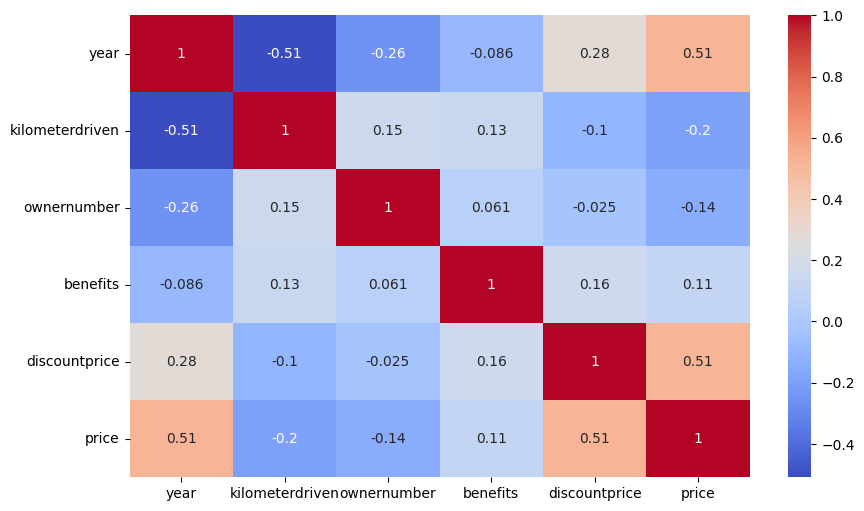

In [ ]:
# Only numerical columns
num_df = df.select_dtypes(include=np.number)
correlation = num_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')



Date based Feature Engineering

In [ ]:
df['created_year'] = df['createdDate'].dt.year
df['created_month'] = df['createdDate'].dt.month
df['created_dayofweek'] = df['createdDate'].dt.dayofweek

Car Age Calculation

In [ ]:
df['car_age'] = df['created_year'] - df['year']
df[['make', 'model', 'year', 'car_age']]

,make,model,year,car_age
0,Hyundai,Elite I20,2017,5
1,Maruti,Alto 800,2016,6
2,Maruti,Dzire,2019,3
3,Kia,Seltos,2020,2
4,Maruti,Ertiga,2017,5
...,...,...,...,...
6432,Mahindra,Xuv500,2013,9
6433,Renault,Kwid,2017,5
6434,Hyundai,I10,2014,8
6435,Maruti,Swift Dzire,2014,8


Data Visualizations

In [ ]:
import plotly.express as px

# Interactive box plot of car price by make and transmission
fig = px.box(
    df,
    x='make',
    y='price',
    color='transmission',
    notched=True,
    points='all',
    hover_data=[
        'model', 'fueltype', 'bodytype', 'year', 'car_age',
        'kilometerdriven', 'ownernumber', 'registrationcity', 'created_year'
    ]
)

fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    title='Price Distribution by Car Make and Transmission Type',
    xaxis_title='Car Make',
    yaxis_title='Price (INR)',
    boxmode='group',
    template='plotly_white'
)

fig.show()

In [ ]:
# Sunburst chart for fueltype and transmission
import plotly.express as px
fig = px.sunburst(df, path=['fueltype', 'transmission'], width=800, height=600)
fig.show()

Univariate Analysis

In [ ]:
# Numerical - Price
fig = px.box(df, y='price', title='Boxplot of Car Prices')
fig.show()

# Car Age Distribution
fig = px.histogram(df, x='car_age', nbins=20, title='Distribution of Car Age')
fig.show()

Bivariate Analysis

In [ ]:
# Price vs Year (Scatter)
fig = px.scatter(df, x='year', y='price', color='fueltype', title='Price vs Year by Fuel Type')
fig.show()

# Boxplot: Price vs Transmission
fig = px.box(df, x='transmission', y='price', color='transmission',
             title='Price Distribution by Transmission Type')
fig.show()

# Price vs Car Age
fig = px.violin(df, x='car_age', y='price', box=True, points='all',
                title='Price Distribution Across Car Age')
fig.show()


Multivariate Analysis

In [ ]:
# Price by Bodytype and Fueltype
fig = px.box(df, x='bodytype', y='price', color='fueltype',
             title='Price by Bodytype and Fueltype')
fig.show()

# Price by Owner Number & Transmission
fig = px.violin(df, x='ownernumber', y='price', color='transmission', box=True,
                title='Price vs Owner Number Colored by Transmission')
fig.show()

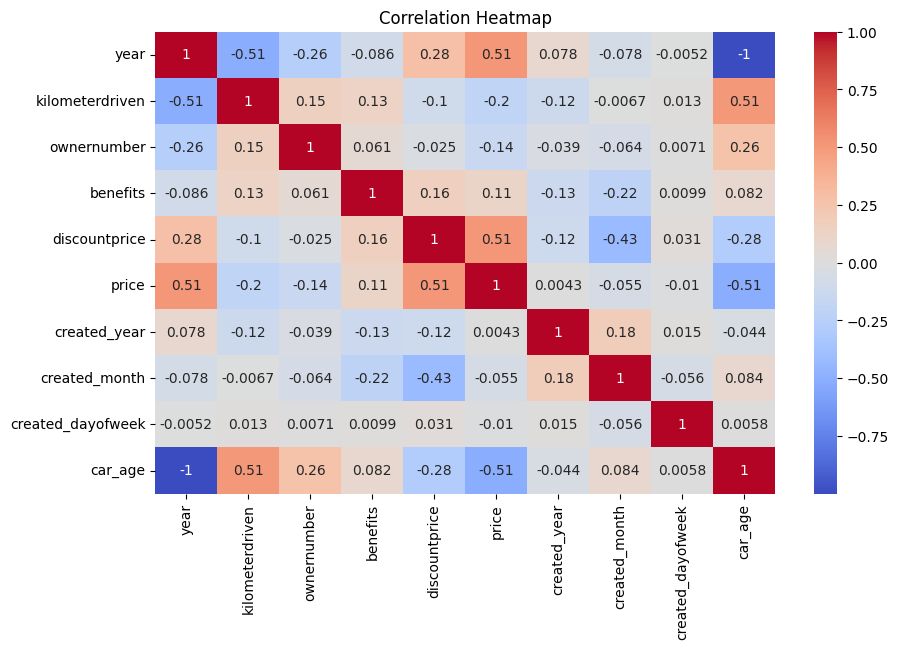

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Company(Brand)

In [ ]:
Company_name = df['make'].value_counts()

top_Company = Company_name.head(20).reset_index()
top_Company.columns = ['make', 'count']

# Create interactive horizontal bar plot
fig = px.bar(
    top_Company,
    x='count',
    y='make',
    orientation='h',
    text='count',
    title='Car Companies by Count',
    color='count',
    color_continuous_scale='viridis'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Car Company',
    yaxis=dict(categoryorder='total ascending'),  # Highest count on top
    template='plotly_white',
    height=600
)

fig.show()

Car Models

In [ ]:
import plotly.express as px

fig = px.treemap(df, path=['make', 'model'], title='Popularity of Car Makes and Models')

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Cars Manufacturing Year

In [ ]:
import plotly.express as px
import plotly.graph_objects as go



# Histogram: Distribution of Car Manufacturing Years
fig4 = px.histogram(
    df,
    x='year',
    nbins=30,
    color_discrete_sequence=['teal'],
    title='Distribution of Car Manufacturing Years'
)
fig4.update_layout(bargap=0.1)
fig4.show()

Cars Sales Yearwise Comparision

In [ ]:
import plotly.express as px
import pandas as pd

# Convert to datetime and extract year
df['createdDate'] = pd.to_datetime(df['createdDate'])
df['year'] = df['createdDate'].dt.year

# Count per year
yearly_sales = df['year'].value_counts().sort_index().reset_index()
yearly_sales.columns = ['year', 'count']

# Plot using a valid Plotly color scale
fig = px.bar(
    yearly_sales,
    x='year',
    y='count',
    text='count',
    title='Year-wise Car Sales',
    color='count',
    color_continuous_scale='viridis'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Car Sales Count',
    template='plotly_white',
    margin=dict(t=60, l=40, r=20, b=40),
    height=500
)

fig.show()

Cars Sales Monthwise Comparision

In [ ]:
df['month_num'] = df['createdDate'].dt.month
df['month_name'] = df['createdDate'].dt.strftime('%B')
df['created_year'] = df['createdDate'].dt.year

# Ensure month order
df['month_name'] = pd.Categorical(df['month_name'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)

monthly_sales = df.groupby(['created_year', 'month_name']).size().reset_index(name='count')

fig = px.line(monthly_sales, x='month_name', y='count', color='created_year',
              title='Monthly Car Listings Over the Years', markers=True)
fig.show()

<Figure size 1000x600 with 0 Axes>

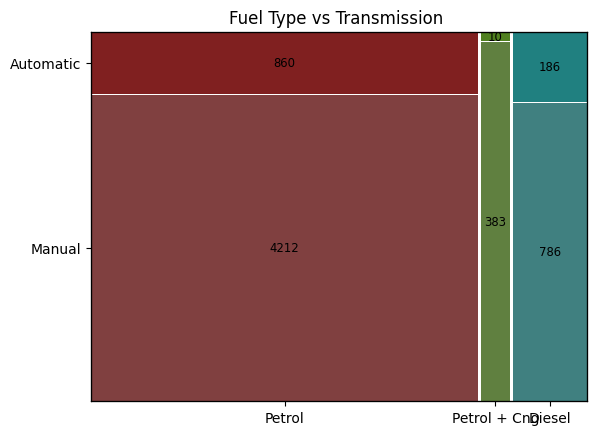

In [ ]:
cross_tab = df.groupby(['fueltype', 'transmission']).size()

def labelizer(key):
    return f"{cross_tab[key]}"

plt.figure(figsize=(10, 6))
mosaic(df, ['fueltype', 'transmission'], labelizer=labelizer)
plt.title('Fuel Type vs Transmission ')
plt.show()

In [ ]:
fig = px.box(df, x='car_age', y='price', points='all', color='transmission',
             title='Car Age vs Price by Transmission Type', hover_data=['make', 'model'])
fig.show()

In [ ]:
fig = px.scatter(df, x='kilometerdriven', y='price', color='fueltype',
                 size='benefits', hover_data=['make', 'model', 'year'],
                 title='Kilometer Driven vs Price Colored by Fuel Type')
fig.show()

In [ ]:
# Avg price per city
avg_price_city = df.groupby('city')['price'].mean().reset_index().sort_values(by='price', ascending=False)

fig = px.bar(avg_price_city, x='city', y='price', title='Average Car Price by City')
fig.show()

In [ ]:
filtered = df[(df['car_age'] < 5) & (df['transmission'] == 'Automatic') & (df['price'] < 1000000)]

fig = px.scatter(filtered, x='kilometerdriven', y='price', color='fueltype',
                 title='Filtered Cars Under 10 Lakh, <5 Years, Automatic')
fig.show()

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()


# Apply Label Encoding
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [ ]:
df_encoded

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,...,discountprice,price,url,createdDate,created_year,created_month,created_dayofweek,car_age,month_num,month_name
0,29,6,40,17,2022,1,35939,2,1,0,...,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24,2022,3,3,5,3,March
1,68,11,9,23,2022,2,6180,1,1,0,...,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09,2022,11,2,6,11,November
2,74,11,36,19,2022,2,46808,1,1,5,...,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30,2022,9,4,3,9,September
3,49,9,98,1,2022,0,26045,1,1,4,...,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04,2022,7,0,2,7,July
4,76,11,43,18,2022,1,53056,1,1,4,...,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28,2022,10,4,5,10,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,64,10,129,13,2022,0,74570,2,1,4,...,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09,2022,12,4,9,12,December
6433,102,15,72,3,2022,1,39981,2,1,0,...,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10,2022,12,5,5,12,December
6434,43,6,59,13,2022,1,61249,1,1,0,...,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10,2022,12,5,8,12,December
6435,84,11,103,13,2022,1,48081,1,1,5,...,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10,2022,12,5,8,12,December


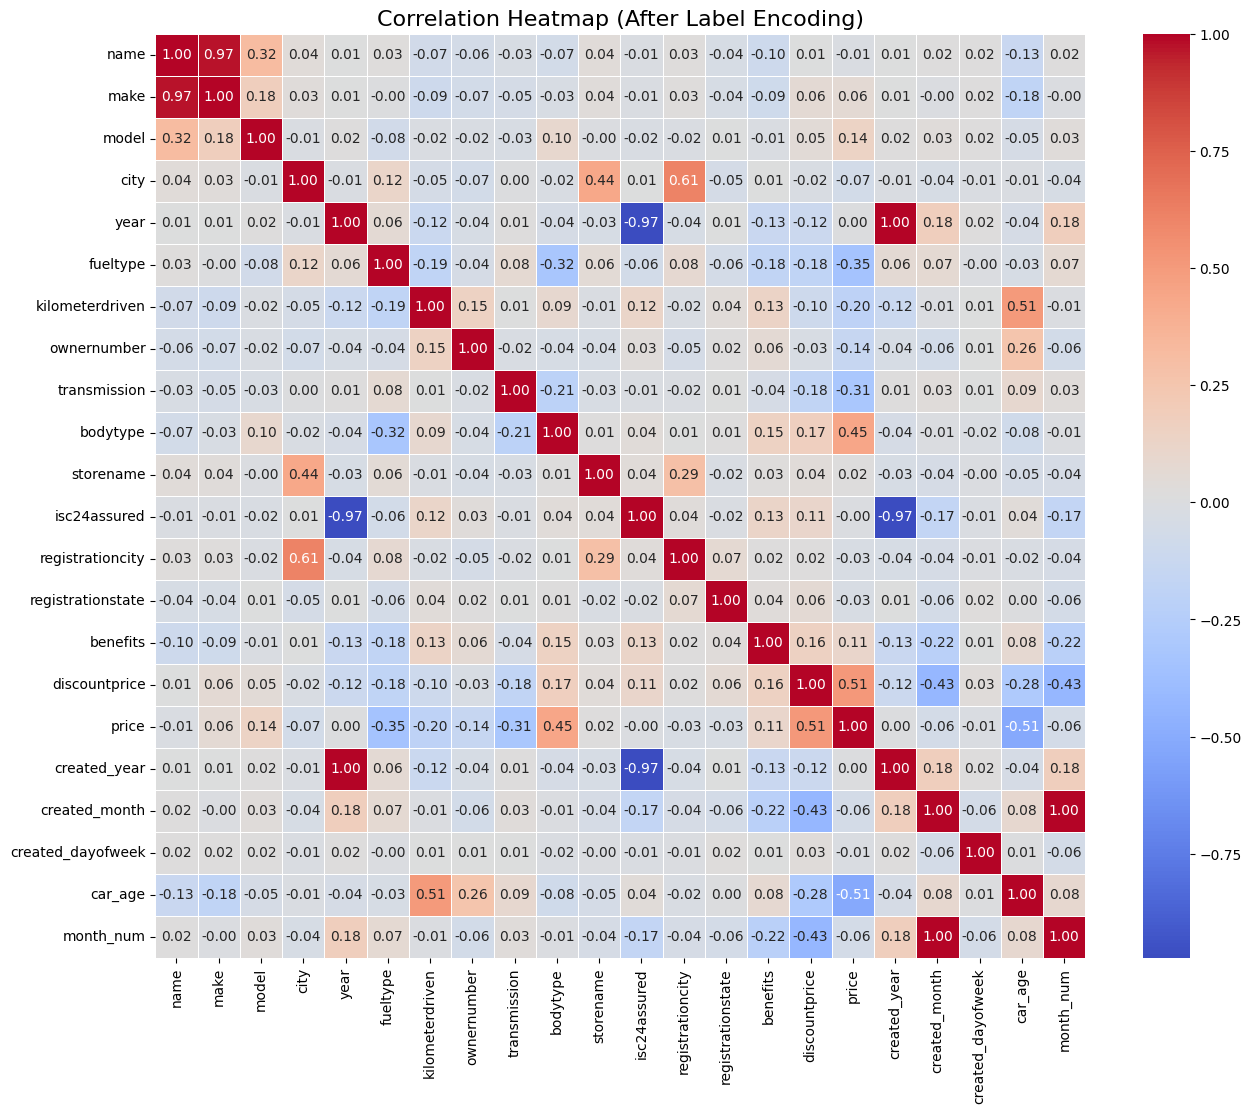

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
corr = df_encoded.drop(columns=['month_name', 'url', 'createdDate']).corr()

# Generate heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (After Label Encoding)', fontsize=16)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6437 entries, 0 to 6436
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               6437 non-null   category      
 1   make               6437 non-null   category      
 2   model              6437 non-null   category      
 3   city               6437 non-null   category      
 4   year               6437 non-null   int32         
 5   fueltype           6437 non-null   category      
 6   kilometerdriven    6437 non-null   int64         
 7   ownernumber        6437 non-null   int64         
 8   transmission       6437 non-null   category      
 9   bodytype           6437 non-null   category      
 10  storename          6437 non-null   category      
 11  isc24assured       6437 non-null   bool          
 12  registrationcity   6437 non-null   category      
 13  registrationstate  6437 non-null   category      
 14  benefits

# Model Building

In [ ]:
# Drop irrelevant columns
df_model = df.drop(columns=['name', 'storename', 'registrationcity', 'registrationstate', 'url', 'createdDate'])

# Set target and features
X = df_model.drop(columns='price')  # Features
y = df_model['price']               # Target



In [ ]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the list of training columns
joblib.dump(X.columns.tolist(), 'training_columns.pkl')

['training_columns.pkl']

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"📊 {model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print("-" * 50)

# Training Models

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression R2: 0.911328045149714
📊 Linear Regression Performance:
MAE: 67024.9367076407
RMSE: 100024.65193261667
R² Score: 0.911328045149714
--------------------------------------------------


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest R2: 0.8933669876131243
📊 Random Forest Performance:
MAE: 65182.24930124224
RMSE: 109688.1587583293
R² Score: 0.8933669876131243
--------------------------------------------------


**XGBoost**

In [ ]:
!pip install XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))
evaluate_model(y_test, y_pred_xgb, "XGBoost")


XGBoost R2: 0.9140045642852783
📊 XGBoost Performance:
MAE: 61894.296875
RMSE: 98503.48509570613
R² Score: 0.9140045642852783
--------------------------------------------------


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree")


📊 Decision Tree Performance:
MAE: 89733.20652173914
RMSE: 149637.30304398164
R² Score: 0.8015496223256293
--------------------------------------------------


**Support Vector Regressor**

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")


📊 Support Vector Regressor Performance:
MAE: 241953.95693078326
RMSE: 347963.684533494
R² Score: -0.07309958555234197
--------------------------------------------------


**K-Nearest Neighbour Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
evaluate_model(y_test, y_pred_knn, "KNN Regressor")


📊 KNN Regressor Performance:
MAE: 99314.7748447205
RMSE: 159629.7221665099
R² Score: 0.774160605414532
--------------------------------------------------


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")


📊 Ridge Regression Performance:
MAE: 67013.69638112403
RMSE: 100027.74782696948
R² Score: 0.9113225560378335
--------------------------------------------------


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


📊 Lasso Regression Performance:
MAE: 66892.79933651986
RMSE: 98945.716343721
R² Score: 0.9132306828932195
--------------------------------------------------


**Gradient Boosing Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting Regressor")


📊 Gradient Boosting Regressor Performance:
MAE: 93350.90615499114
RMSE: 133218.6018030809
R² Score: 0.8427097046958578
--------------------------------------------------


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Results dictionary
results = {'Model': [], 'R2 Score': [], 'MAE': [], 'RMSE': []}

for name, model in models.items():
    if name in ['SVR', 'KNN', 'Ridge', 'Lasso']:  # Requires scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results['Model'].append(name)
    results['R2 Score'].append(r2_score(y_test, y_pred))
    results['MAE'].append(mean_absolute_error(y_test, y_pred))
    results['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))


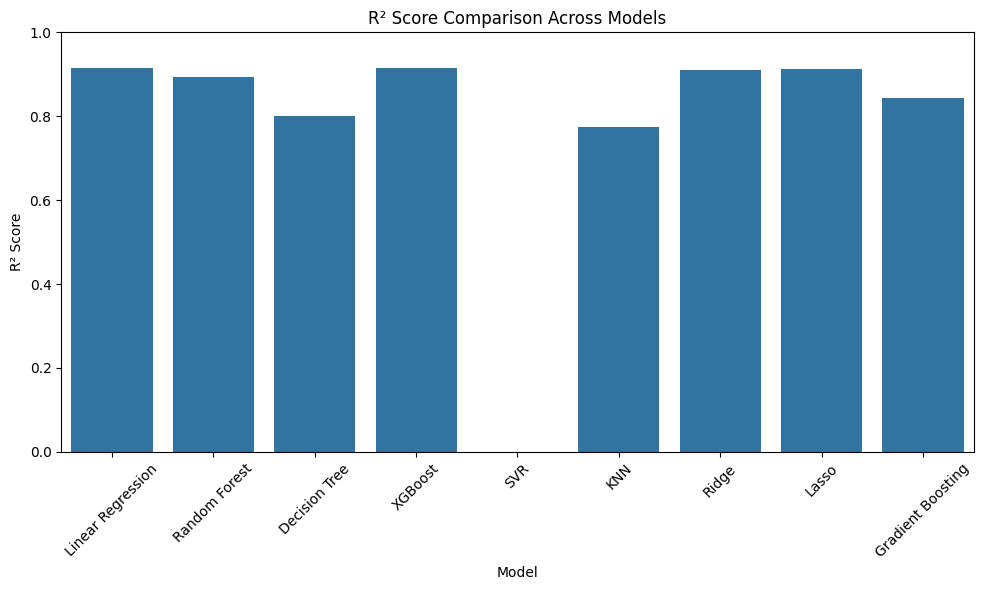

In [ ]:
import pandas as pd

# Convert results to DataFrame
results_df = pd.DataFrame(results)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='R2 Score')
plt.title('R² Score Comparison Across Models')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



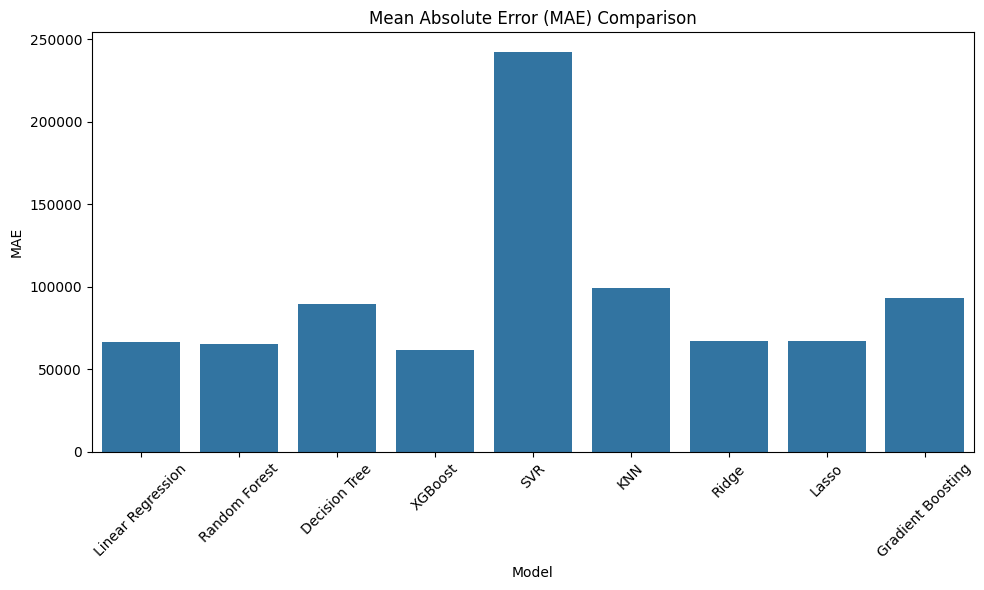

In [ ]:
#Plot MAE
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MAE')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


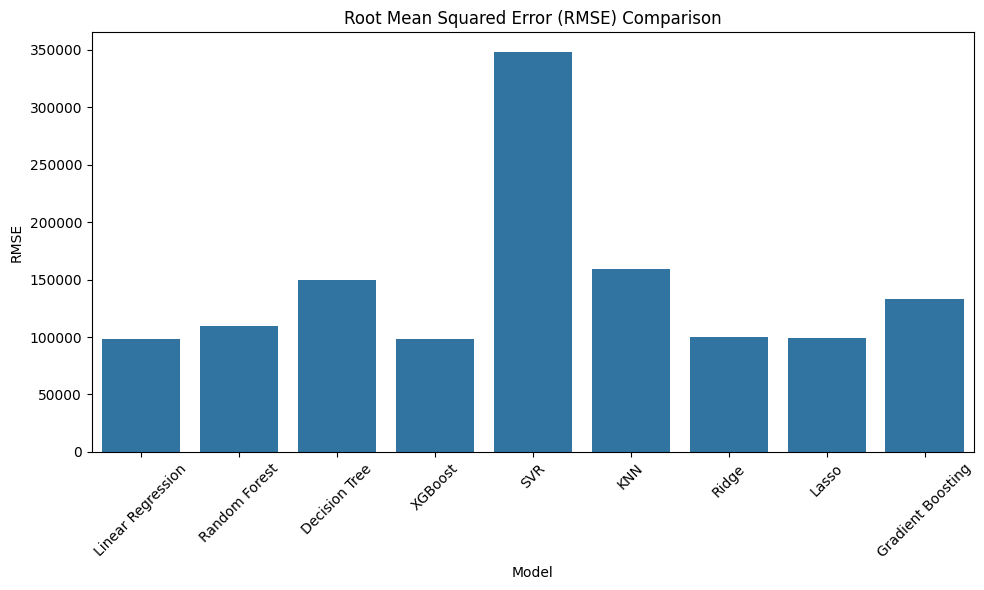

In [ ]:
# Plot RMSE
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
importances = rf.feature_importances_
feat_names = X.columns
important_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
important_df.sort_values(by='Importance', ascending=False).head(10)


,Feature,Importance
5,discountprice,0.287688
209,bodytype_SUV,0.153200
9,car_age,0.138093
210,bodytype_Sedan,0.040423
206,bodytype_Luxury SUV,0.031147
1,kilometerdriven,0.020357
20,make_Mahindra,0.018581
68,model_Eeco,0.017412
205,transmission_Manual,0.015989
19,make_Kia,0.014813


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by R² Score (descending)
results_sorted = results_df.sort_values(by='R2 Score', ascending=False)

# Display as a clean table
print("📊 R² Scores for All Models:\n")
print(results_sorted[['Model', 'R2 Score']].to_string(index=False))


📊 R² Scores for All Models:

            Model  R2 Score
Linear Regression  0.914735
          XGBoost  0.914005
            Lasso  0.913231
            Ridge  0.911323
    Random Forest  0.893367
Gradient Boosting  0.842710
    Decision Tree  0.801550
              KNN  0.774161
              SVR -0.073100


In [ ]:
# Sort by R² descending (higher is better)
best_model_row = results_df.sort_values(by='R2 Score', ascending=False).iloc[0]
best_model_name = best_model_row['Model']

print(f"✅ Best Performing Model: {best_model_name}")
print(best_model_row)


✅ Best Performing Model: Linear Regression
Model       Linear Regression
R2 Score             0.914735
MAE               66659.45513
RMSE              98084.30816
Name: 0, dtype: object


In [65]:
# Sort by R² descending (higher is better)
results_sorted = results_df.sort_values(by='R2 Score', ascending=False)

# Print the sorted results to examine all metrics
print("Model Performance Summary:")
display(results_sorted)

# Identify the best model based on R2 (highest) and MAE/RMSE (lowest)
# Based on the output of results_sorted, Linear Regression has the highest R2 and lowest MAE/RMSE among the top models.
best_model_name = results_sorted.iloc[0]['Model']

print(f"\nBased on R², MAE, and RMSE, the best performing model is: {best_model_name}")

Model Performance Summary:


,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.914735,66659.455130,98084.308160
3,XGBoost,0.914005,61894.296875,98503.485096
7,Lasso,0.913231,66892.799337,98945.716344
6,Ridge,0.911323,67013.696381,100027.747827
1,Random Forest,0.893367,65182.249301,109688.158758
8,Gradient Boosting,0.842710,93350.906155,133218.601803
2,Decision Tree,0.801550,89733.206522,149637.303044
5,KNN,0.774161,99314.774845,159629.722167
4,SVR,-0.073100,241953.956931,347963.684533



Based on R², MAE, and RMSE, the best performing model is: Linear Regression


In [66]:
import joblib

filename = 'best_model.pkl'
joblib.dump(lr, filename)

['best_model.pkl']

In [68]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd

try:
    model = joblib.load('best_model.pkl')
    scaler = joblib.load('scaler.pkl')
    st.success("Model and scaler loaded successfully!")
except FileNotFoundError:
    st.error("Error loading model or scaler. Make sure 'best_model.pkl' and 'scaler.pkl' are in the correct directory.")
    st.stop()

# Load the training columns:
try:
    # Attempt to load saved training columns
    training_columns = joblib.load('training_columns.pkl')
    st.success("Training columns loaded successfully!")
except FileNotFoundError:
    st.warning("Could not find 'training_columns.pkl'. Using a placeholder list. Predictions may be inaccurate.")
    # In a real application, you MUST load the actual training columns.
    # This is a placeholder for demonstration purposes.
    training_columns = ['year', 'kilometerdriven', 'ownernumber', 'isc24assured', 'benefits', 'discountprice', 'created_year', 'created_month', 'created_dayofweek', 'car_age', 'month_num'] # Add your actual columns here


st.title('Car Price Prediction App')

st.write("""
This app predicts the price of a car based on its features.
Please enter the car's specifications below:
""")

year = st.number_input('Year', min_value=1990, max_value=2023, value=2022)
kilometerdriven = st.number_input('Kilometer Driven', min_value=0, value=50000)
ownernumber = st.selectbox('Owner Number', [1, 2, 3])
isc24assured = st.checkbox('Is C24 Assured?')
benefits = st.number_input('Benefits', min_value=0, value=10000)
discountprice = st.number_input('Discount Price', min_value=0, value=5000)


created_year = 2023 # Example
created_month = 1 # Example
created_dayofweek = 0 # Example (Monday)
car_age = created_year - year # Example
month_num = created_month # Example


# Create a DataFrame from the input
input_data = pd.DataFrame([[
    year, kilometerdriven, ownernumber, isc24assured, benefits, discountprice,
    created_year, created_month, created_dayofweek, car_age, month_num
    # Add values for all other features (including dummy variables) here
]], columns=['year', 'kilometerdriven', 'ownernumber', 'isc24assured', 'benefits', 'discountprice', 'created_year', 'created_month', 'created_dayofweek', 'car_age', 'month_num']) # Add your actual columns here

# Example of aligning columns (assuming you loaded 'training_columns.pkl')
try:
    input_data = input_data.reindex(columns=training_columns, fill_value=0)
except NameError:
    st.error("Training columns not loaded. Cannot align input data. Please ensure 'training_columns.pkl' exists.")
    st.stop()


# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Make prediction
if st.button('Predict Price'):
    prediction = model.predict(input_data_scaled)
    st.success(f'Predicted Car Price: ₹{prediction[0]:,.2f}')

Writing app.py
